# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime as dt
from sklearn import metrics
import seaborn as sns
#import pandas_profiling
from scipy import stats

from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, auc,mean_absolute_error,mean_squared_error, r2_score


In [2]:
import os
os.chdir("C:\\Users\\keshavk\\code\\final project")

# IMPORTING SOURCE DATA

In [3]:
train=pd.read_csv(r'sales_data_set.csv',parse_dates=['Date'])
features=pd.read_csv(r'Features_data_set.csv',parse_dates=['Date'])
stores=pd.read_csv(r'stores_data_set.csv')

In [4]:
train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [6]:
train.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [7]:
features.head(2)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [8]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [9]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [10]:
stores.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [11]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [12]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [13]:
train.shape,features.shape,stores.shape

((421570, 5), (8190, 12), (45, 3))

# Handling missing values of features dataset

In [14]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

C:\Users\jeetg\AppData\Local\Temp\ipykernel_6900\3730161683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features["CPI"].fillna(features["CPI"].median(),inplace=True)
C:\Users\jeetg\AppData\Local\Temp\ipykernel_6900\3730161683.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [15]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

C:\Users\jeetg\AppData\Local\Temp\ipykernel_6900\3756656198.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features["MarkDown"+str(i)].fillna(value=0,inplace=True)


In [16]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


# Merging Training Dataset and merged stores-features Dataset

In [17]:
data = pd.merge(train,stores,on='Store',how='left')

In [18]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,False,A,151315
1,1,1,12/02/2010,46039.49,True,A,151315


In [19]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [20]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True


In [21]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [22]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Type          421570 non-null  object 
 5   Size          421570 non-null  int64  
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [23]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,05/02/2010,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False


In [24]:
# data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
# data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [25]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,1,05/02/2010,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True


# CONVERTING DATE COLUMN INTO DATETIME

In [26]:
# convert the date column into a datetime object
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

In [27]:
y=[]
m=[]
d=[]
for dt in data['Date']:
    y.append(dt.year)
    m.append(dt.month)
    d.append(dt.day)

In [28]:
data['Year'] = pd.Series(y)
data['Month'] = pd.Series(m)
data['Day'] = pd.Series(d)

In [29]:
data.head(2)

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Day
0,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
1,1,1,2010-02-12,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010,2,12


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  IsHoliday     421

In [31]:
data.drop('Date',axis=1,inplace=True)

In [32]:
data.head()

,Store,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Day
0,1,1,24924.50,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2010,2,5
1,1,1,46039.49,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,2010,2,12
2,1,1,41595.55,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,2010,2,19
3,1,1,19403.54,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,2010,2,26
4,1,1,21827.90,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,2010,3,5


# EDA

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   Type          421570 non-null  object 
 4   Size          421570 non-null  int64  
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday     421570 non-null  bool   
 15  Year          421570 non-null  int64  
 16  Month         421570 non-null  int64  
 17  Day           421570 non-null  int64  
dtypes: b

## Finding Empty Percentage

In [34]:
null_data = (data.isnull().mean()*100).round(2)

In [35]:
null_data.index

Index(['Store', 'Dept', 'Weekly_Sales', 'Type', 'Size', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday', 'Year', 'Month',
       'Day'],
      dtype='object')

In [36]:
pd.DataFrame({
    "column_name": null_data.index,
    "Null Perc":null_data.values
}).sort_values("Null Perc",ascending=False)

,column_name,Null Perc
0,Store,0.0
1,Dept,0.0
16,Month,0.0
15,Year,0.0
14,IsHoliday,0.0
13,Unemployment,0.0
12,CPI,0.0
11,MarkDown5,0.0
10,MarkDown4,0.0
9,MarkDown3,0.0


## De-duplication

In [37]:
a = data.duplicated().sum()

In [38]:
print("Total Duplicated datapoints: ",a)

Total Duplicated datapoints:  0


# Number of "0" data availablity - sparcity

In [39]:
col_with_zero = []
for i in data.columns:
    perc_zero = (data[i]==0).mean()*100
    col_with_zero.append((i,perc_zero))

zero_percent = pd.DataFrame(col_with_zero,columns=['column_name','zero_percentage']).sort_values("zero_percentage",ascending=False)
zero_percent

,column_name,zero_percentage
14,IsHoliday,92.964158
8,MarkDown2,73.971108
10,MarkDown4,67.984676
9,MarkDown3,67.557701
7,MarkDown1,64.257181
11,MarkDown5,64.079038
2,Weekly_Sales,0.017316
16,Month,0.000000
15,Year,0.000000
13,Unemployment,0.000000


## Feature Distribution

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   Type          421570 non-null  object 
 4   Size          421570 non-null  int64  
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday     421570 non-null  bool   
 15  Year          421570 non-null  int64  
 16  Month         421570 non-null  int64  
 17  Day           421570 non-null  int64  
dtypes: b

In [41]:
import seaborn as sns

def plot_cat(column_name):
    data_1 = data[column_name].value_counts()
    print(data_1)
    color = sns.color_palette("husl",len(data_1))
    plt.figure(figsize=(16,8))
    data_1.plot(kind="bar",color=color)
    plt.show()

Store
13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
32    10202
19    10148
31    10142
28    10113
41    10088
11    10062
23    10050
14    10040
40    10017
15     9901
8      9895
39     9878
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
45     9637
21     9582
35     9528
29     9455
16     9443
3      9036
5      8999
9      8867
38     7362
37     7206
44     7169
30     7156
42     6953
43     6751
33     6487
36     6222
Name: count, dtype: int64


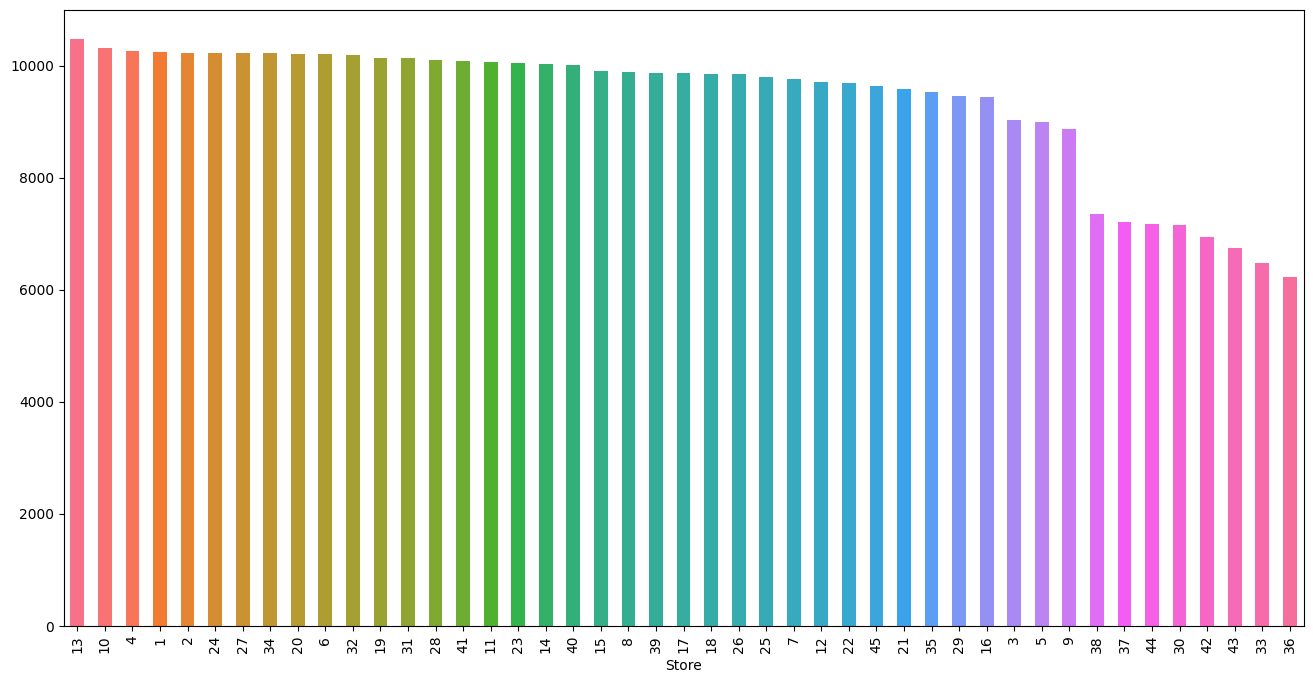

In [42]:
plot_cat("Store")

Dept
1     6435
16    6435
92    6435
38    6435
40    6435
      ... 
78     235
77     150
65     143
39      16
43      12
Name: count, Length: 81, dtype: int64


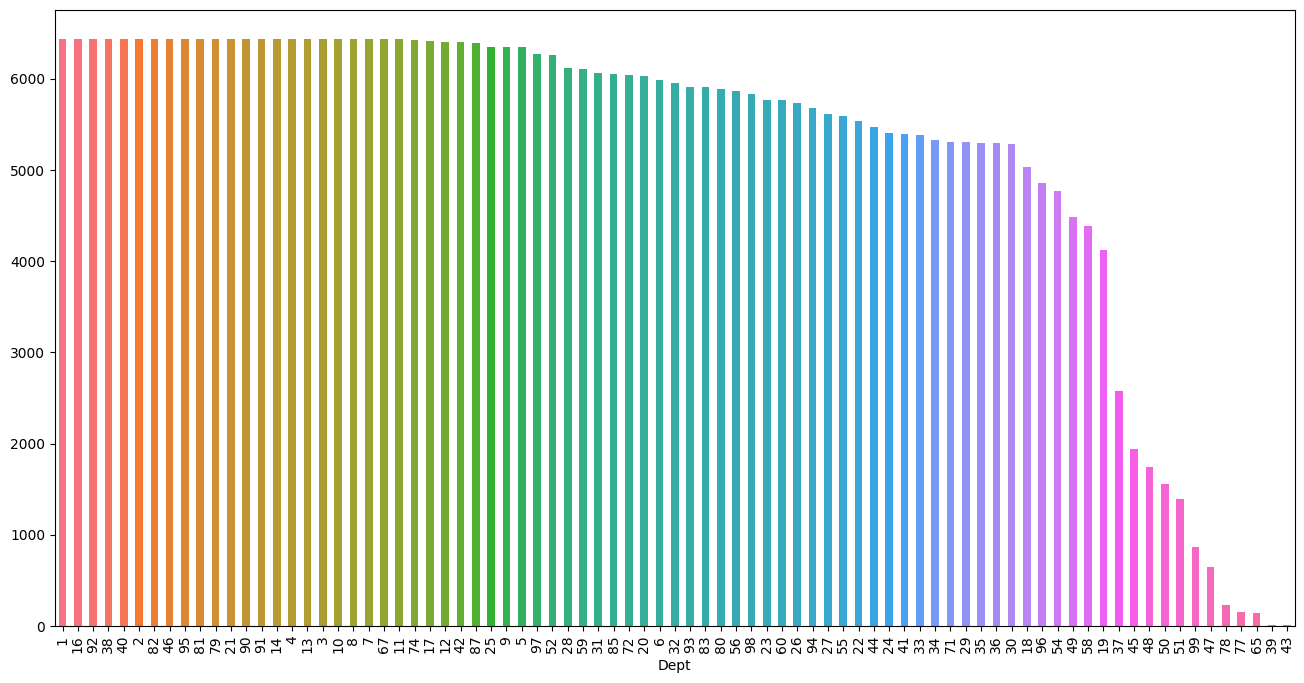

In [43]:
plot_cat("Dept")

IsHoliday
False    391909
True      29661
Name: count, dtype: int64


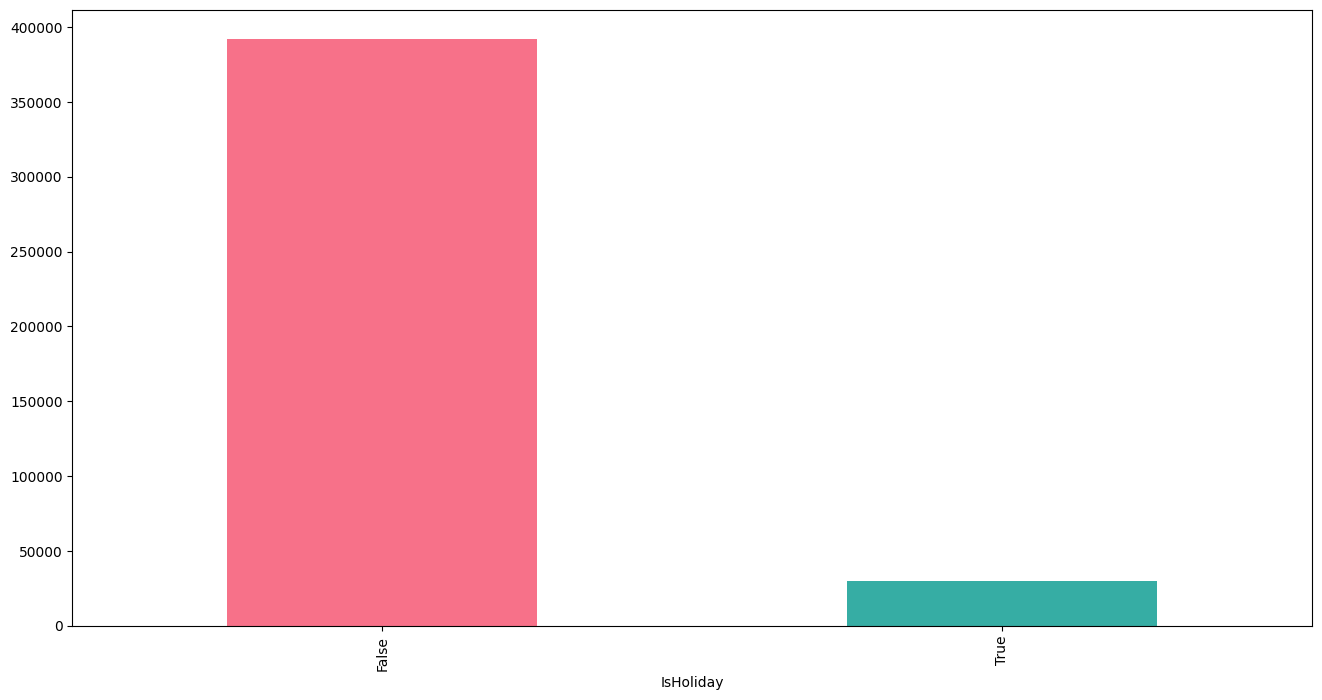

In [44]:
plot_cat("IsHoliday")

Temperature
50.43    709
67.87    646
72.62    594
76.67    583
70.28    563
        ... 
56.50     41
55.47     40
58.40     40
66.79     39
64.09     38
Name: count, Length: 3528, dtype: int64


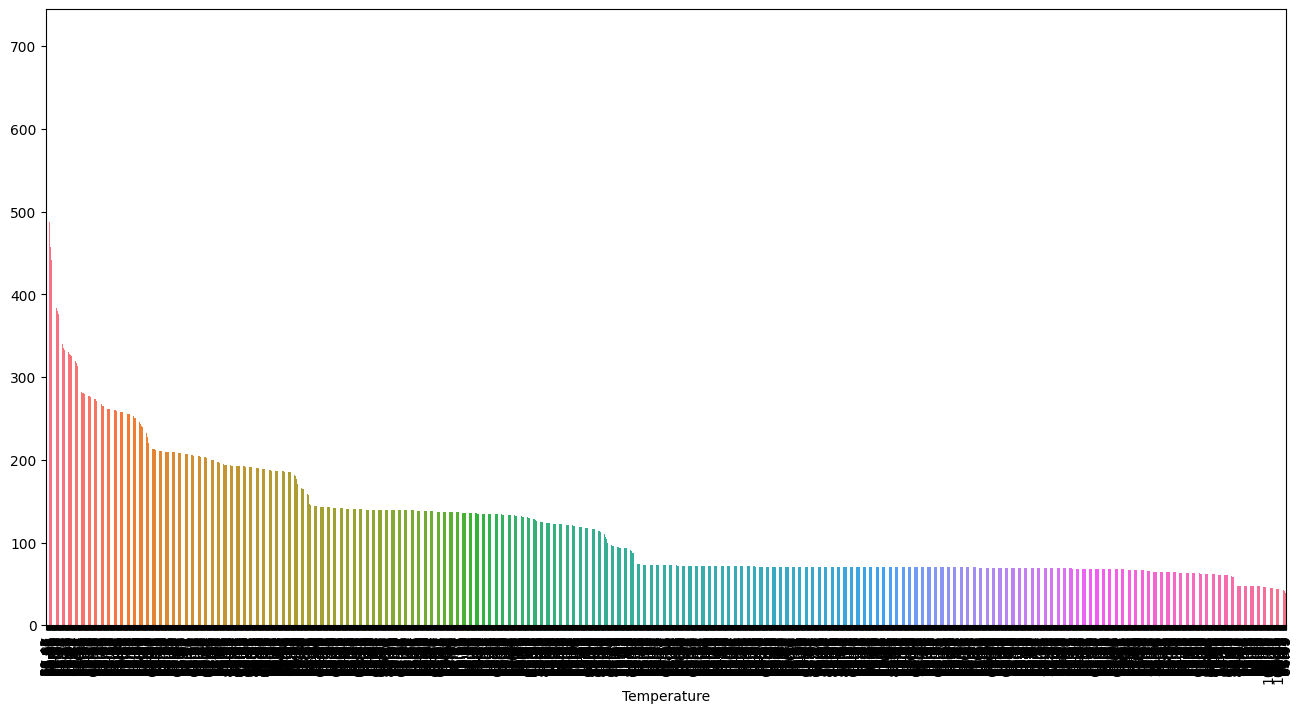

In [45]:
plot_cat("Temperature")

CPI
129.855533    711
131.108333    708
129.845967    707
130.384903    706
130.645793    706
             ... 
203.831516     45
213.173668     44
207.620696     44
207.495309     44
211.587991     44
Name: count, Length: 2145, dtype: int64


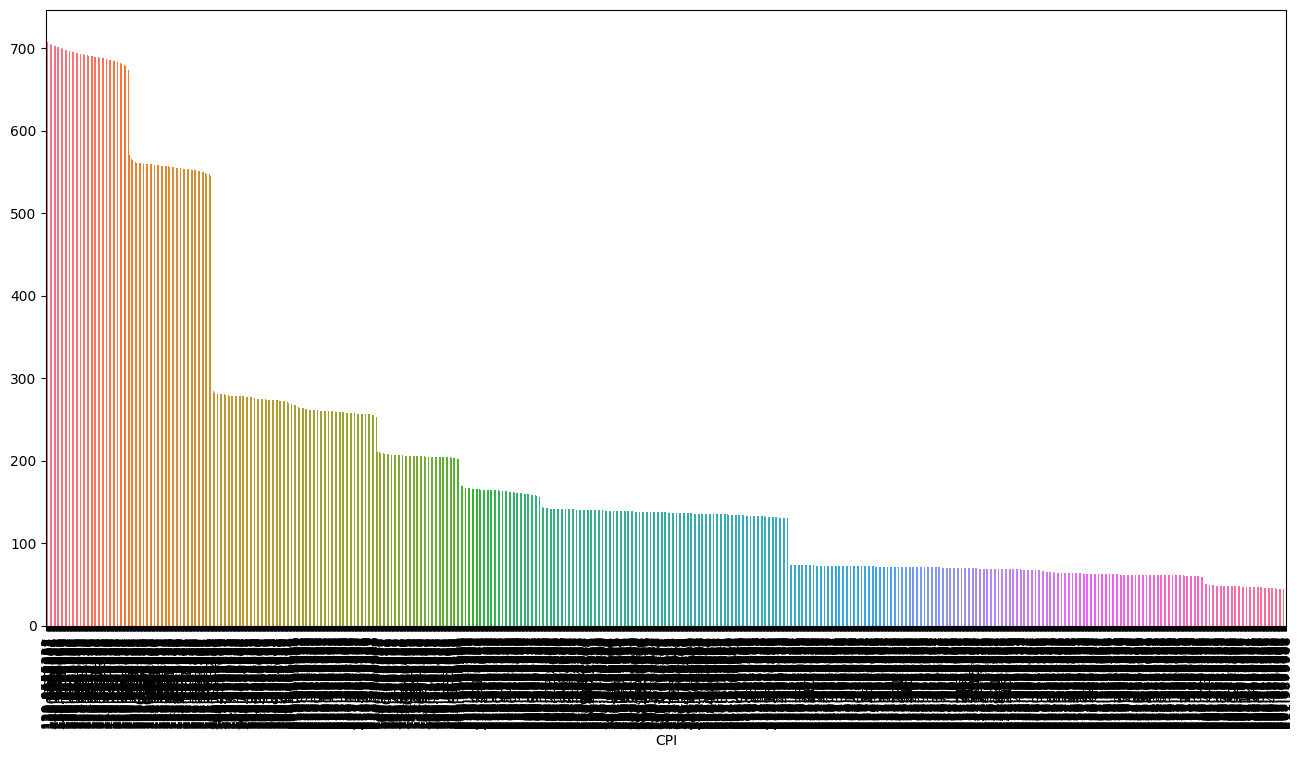

In [46]:
plot_cat("CPI")

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64


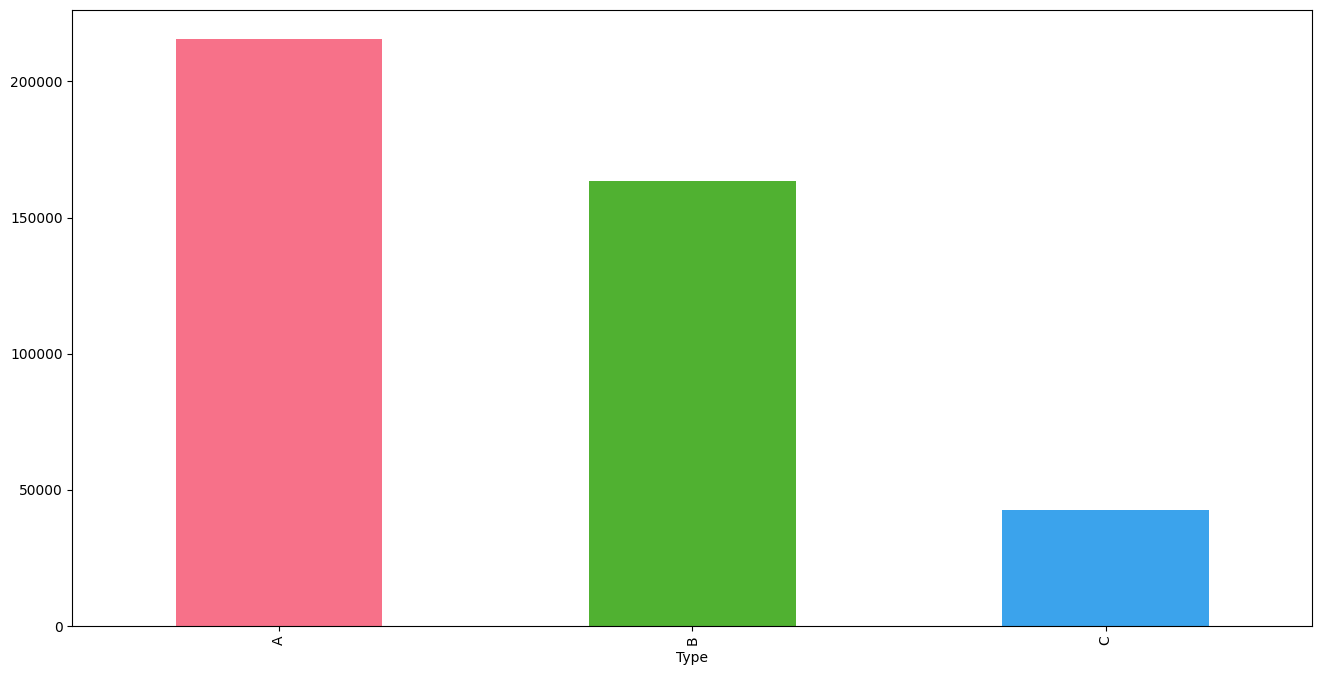

In [47]:
plot_cat("Type")

Year
2011    153453
2010    140679
2012    127438
Name: count, dtype: int64


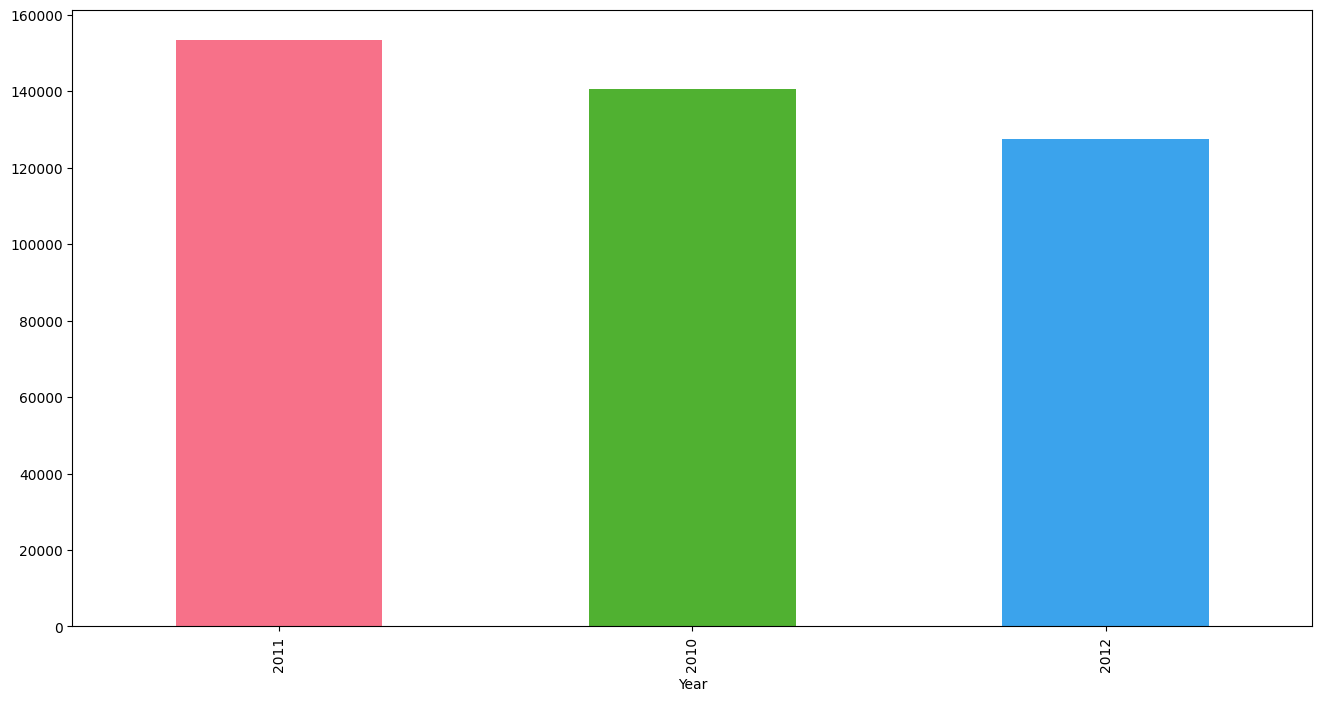

In [48]:
plot_cat("Year")

Month
4     41332
7     40980
3     38451
10    38362
9     38339
8     38169
6     38137
2     35526
5     35314
12    29802
11    23613
1     23545
Name: count, dtype: int64


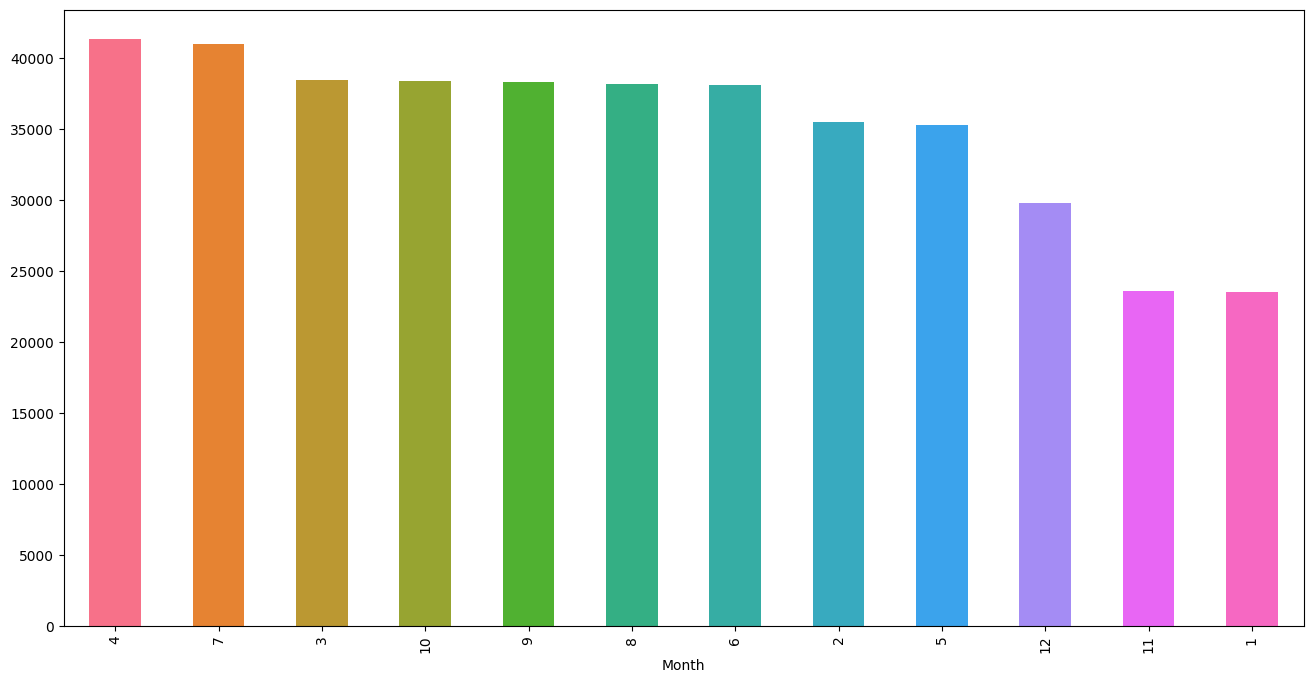

In [49]:
plot_cat("Month")

Day
23    14801
2     14799
6     14799
9     14796
17    14795
16    14768
10    14767
12    14760
13    14758
25    14753
30    14752
11    14749
26    14746
24    14741
3     14741
19    14739
5     14734
18    14733
20    14723
4     14703
27    14680
7     11786
22    11766
14    11763
15    11763
8     11762
1     11760
28    11752
21    11740
29    11736
31     5905
Name: count, dtype: int64


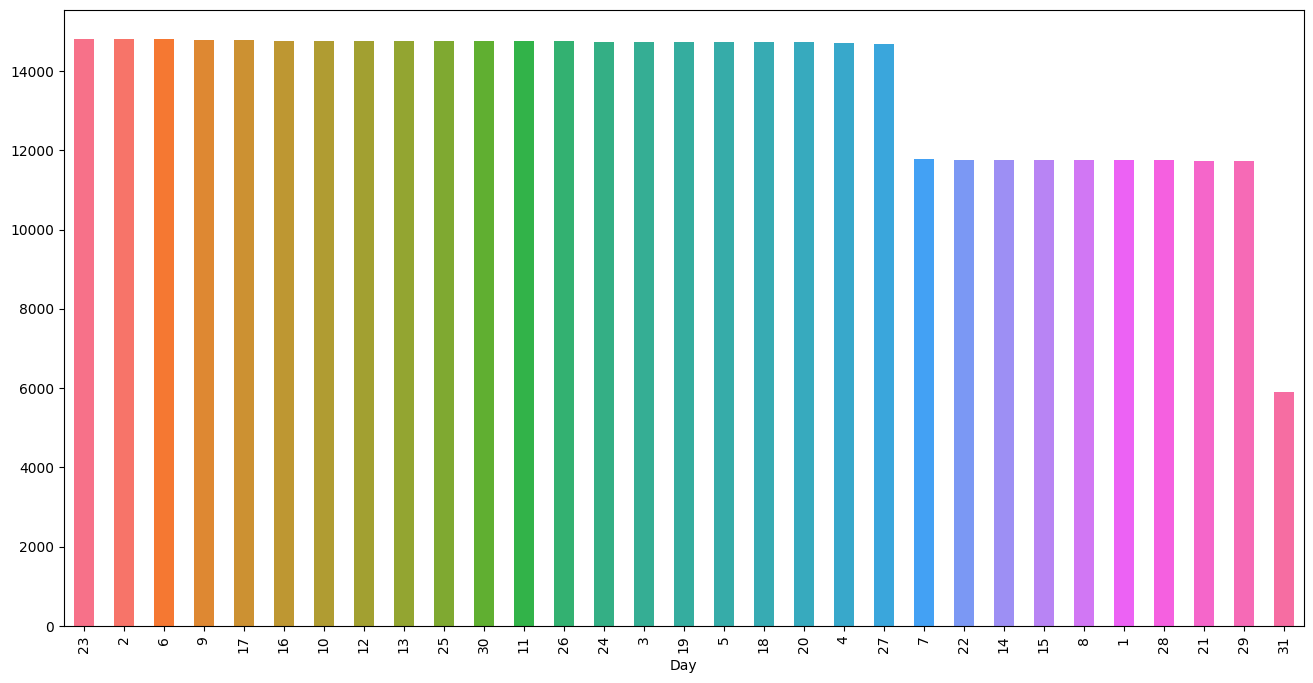

In [50]:
plot_cat("Day")

MarkDown1
0.00       270889
1.50          102
460.73        102
175.64         93
1282.42        75
            ...  
196.40         42
243.47         42
512.15         42
318.51         42
945.96         42
Name: count, Length: 2278, dtype: int64


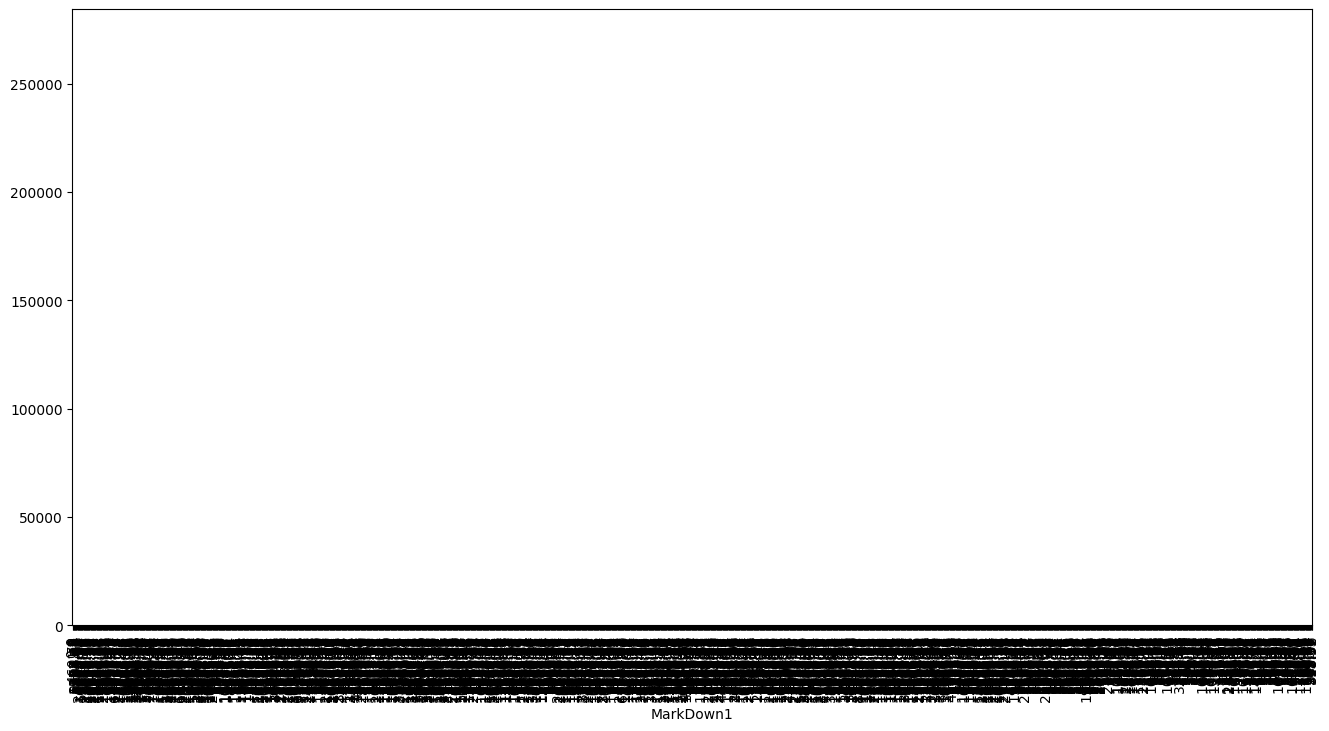

In [51]:
plot_cat("MarkDown1")

MarkDown2
0.00      311840
1.91         539
3.00         493
0.50         485
1.50         471
           ...  
7.40          44
417.07        44
8.64          44
13.71         44
171.14        43
Name: count, Length: 1481, dtype: int64


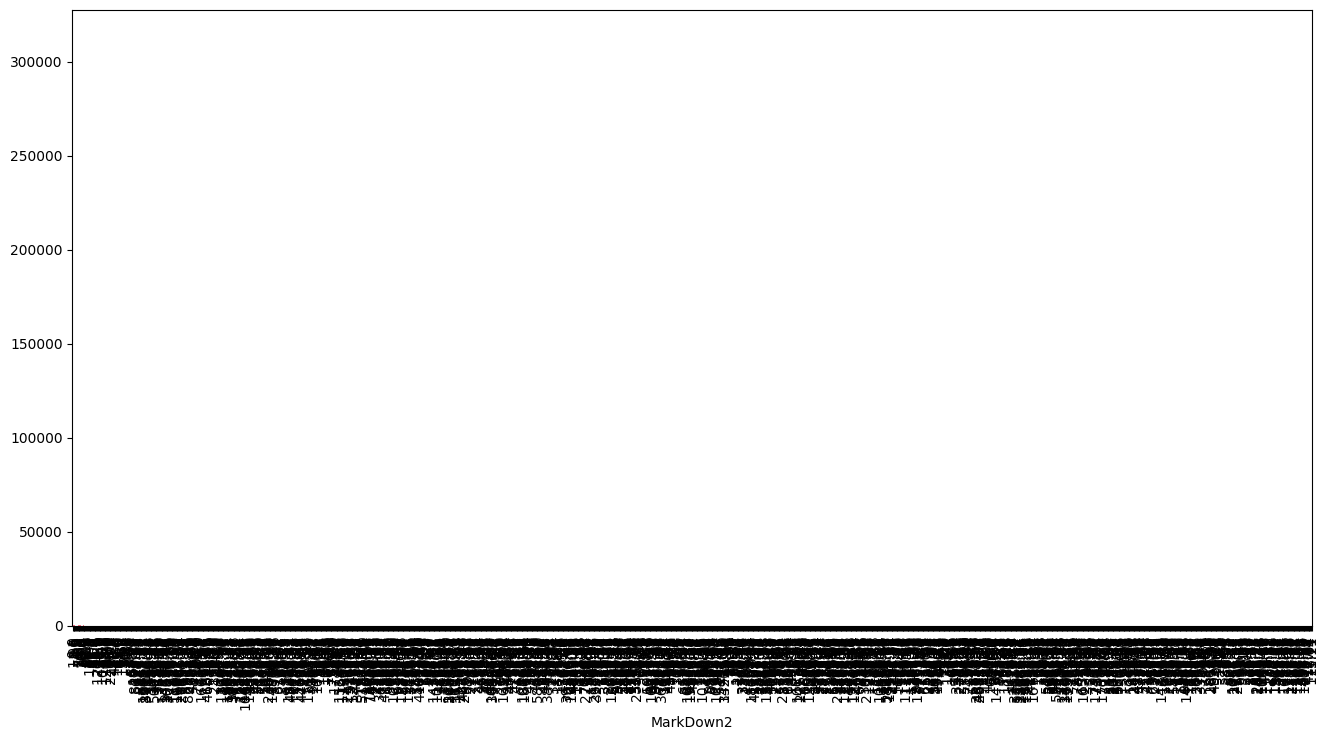

In [52]:
plot_cat("MarkDown2")

MarkDown3
0.00     284803
3.00        754
6.00        710
2.00        660
1.00        611
          ...  
51.66        45
0.76         45
26.26        44
7.04         44
2.62         43
Name: count, Length: 1658, dtype: int64


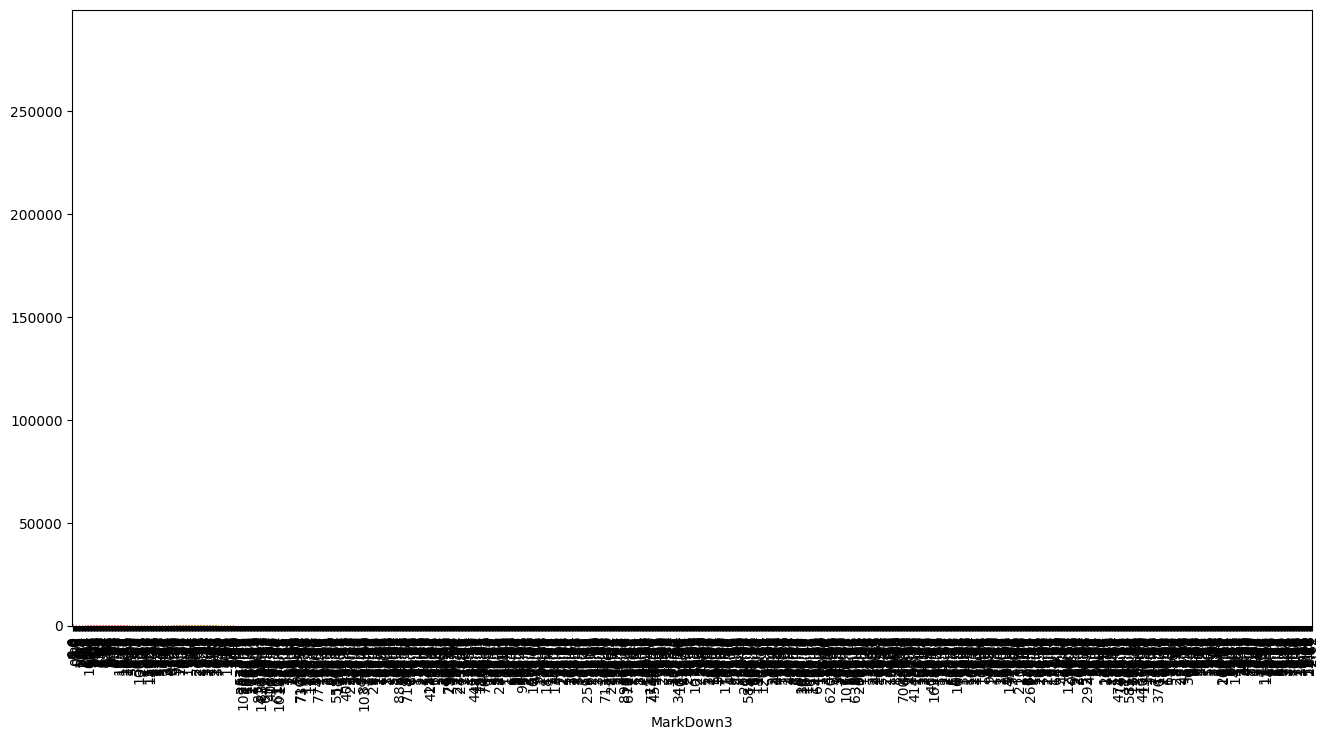

In [53]:
plot_cat("MarkDown3")

MarkDown4
0.00      286603
9.00         280
4.00         200
2.00         197
3.00         146
           ...  
3.44          44
231.31        44
18.38         43
64.47         42
4.02          42
Name: count, Length: 1945, dtype: int64


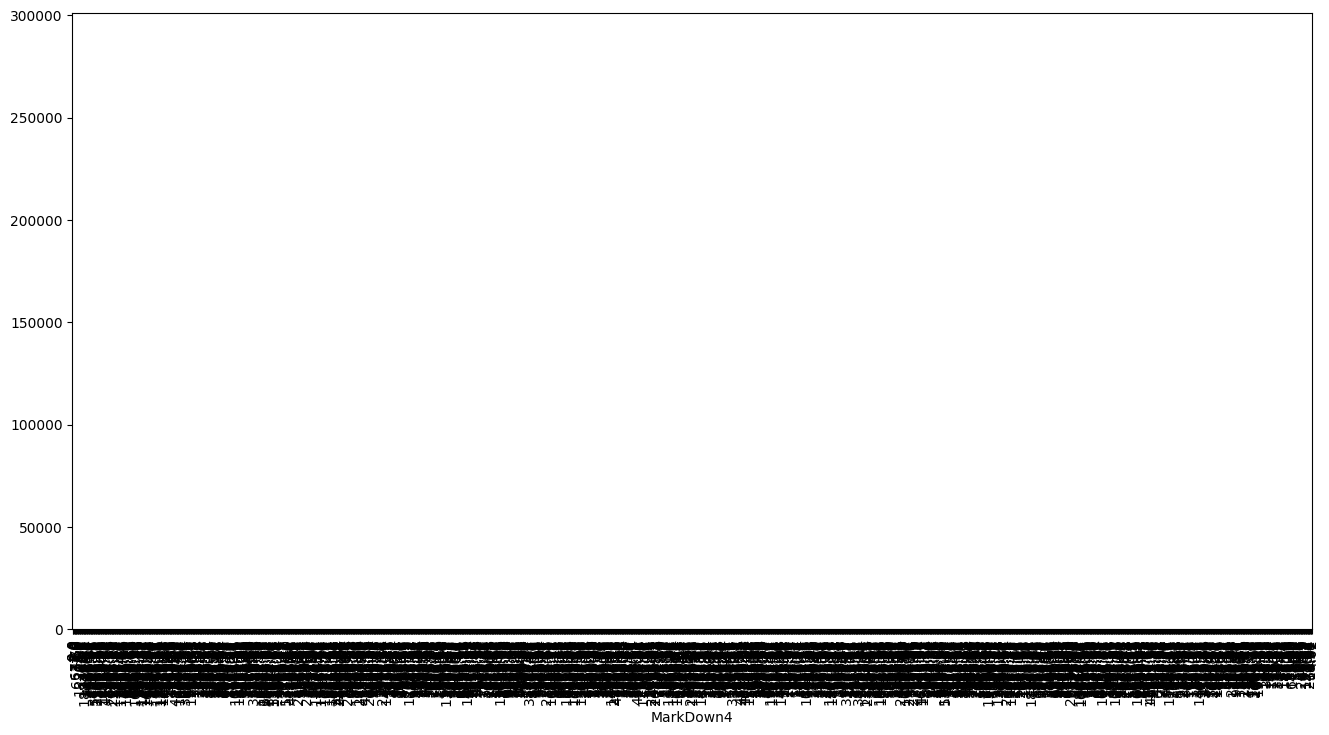

In [54]:
plot_cat("MarkDown4")

MarkDown5
0.00       270138
2743.18       136
1064.56       120
9083.54        75
3567.03        75
            ...  
1674.50        42
1077.74        42
1012.91        42
2359.78        42
1805.33        42
Name: count, Length: 2294, dtype: int64


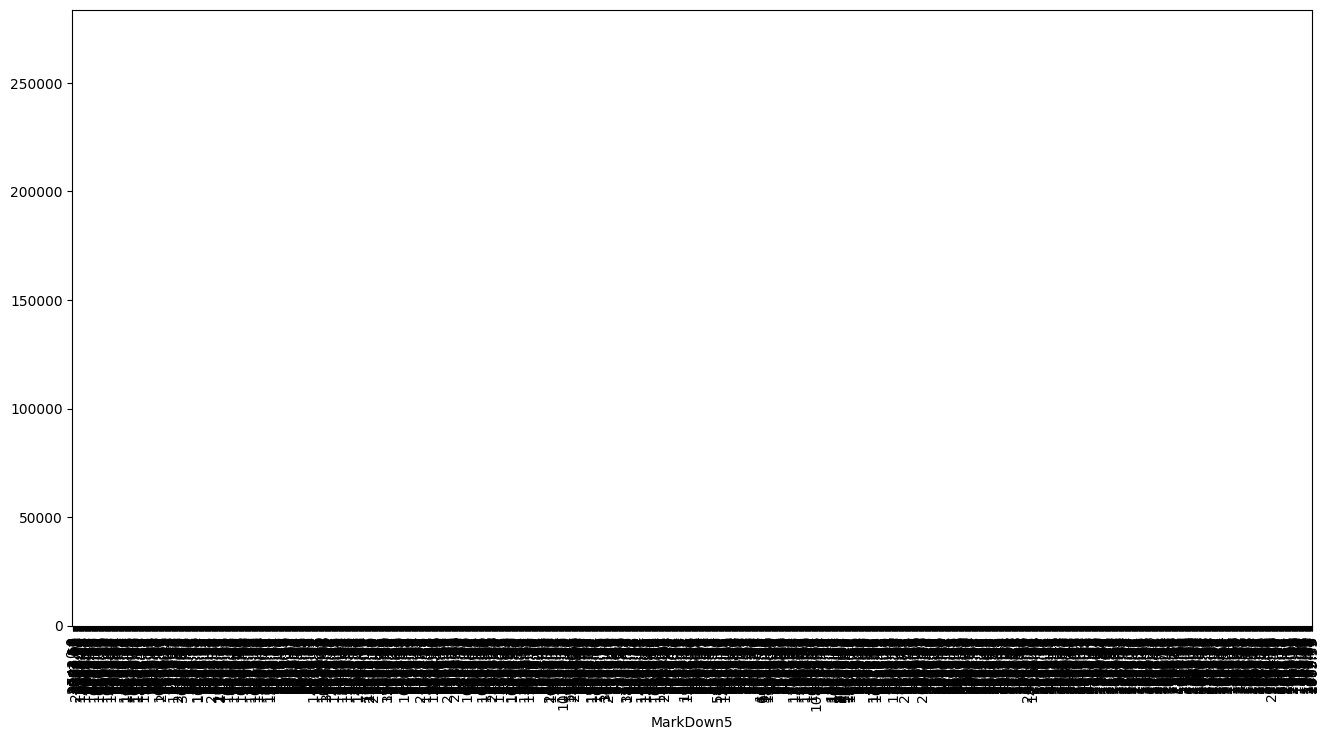

In [55]:
plot_cat("MarkDown5")

# SPLITTING NUMERICAL AND CATEGORICAL COLUMNS

In [56]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object', 'O','bool']]

NUMERIC

In [57]:
numeric_var_names

['Store',
 'Dept',
 'Weekly_Sales',
 'Size',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Year',
 'Month',
 'Day']

CATEGORIAL

In [58]:
cat_var_names

['Type', 'IsHoliday']

In [59]:
data_num=data[numeric_var_names]
data_num.head(5)

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day
0,1,1,24924.50,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5
1,1,1,46039.49,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,12
2,1,1,41595.55,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,19
3,1,1,19403.54,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,26
4,1,1,21827.90,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,5


In [60]:
data_num.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64

# Replace negative and 0 as missing

In [61]:
# Replace negative and 0 as missing
pd.set_option('mode.chained_assignment', None) # For SettingWithCopyWarning
data_num[data_num<=0]=np.NaN

In [62]:
data_num.isna().sum()

Store                0
Dept                 0
Weekly_Sales      1358
Size                 0
Temperature         69
Fuel_Price           0
MarkDown1       270889
MarkDown2       311840
MarkDown3       284803
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Day                  0
dtype: int64

In [63]:
data_cat=data[cat_var_names]
data_cat.head(5)

,Type,IsHoliday
0,A,False
1,A,True
2,A,False
3,A,False
4,A,False


In [64]:
data_cat[data_cat['Type']=='B']

,Type,IsHoliday
20482,B,False
20483,B,True
20484,B,False
20485,B,False
20486,B,False
...,...,...
421565,B,False
421566,B,False
421567,B,False
421568,B,False


### Data Audit Report

FOR NUMERIC COLUMNS

In [65]:
# Creating Data audit Report
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.std()/x.mean(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()],
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'CV','MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

data_num.apply(var_summary).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,CV,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Store,421570.0,0.0,9.359084e+06,22.200546,22.00000,12.785297,1.634638e+02,0.575900,1.000,1.000000,3.000000,5.000000,11.000000,22.00000,33.000000,40.000000,43.000000,45.000000,45.000000
Dept,421570.0,0.0,1.865882e+07,44.260317,37.00000,30.492054,9.297654e+02,0.688925,1.000,1.000000,4.000000,7.000000,18.000000,37.00000,74.000000,92.000000,95.000000,98.000000,99.000000
Weekly_Sales,420212.0,1358.0,6.737307e+09,16033.114591,7661.70000,22729.492116,5.166298e+08,1.417659,0.010,7.440000,67.551000,311.186000,2120.130000,7661.70000,20271.265000,42922.748000,61275.522000,106566.351400,693099.360000
Size,421570.0,0.0,5.764039e+10,136727.915739,140167.00000,60980.583328,3.718632e+09,0.446000,34875.000,34875.000000,39690.000000,39910.000000,93638.000000,140167.00000,202505.000000,204184.000000,206302.000000,219622.000000,219622.000000
Temperature,421501.0,69.0,2.533231e+07,60.100233,62.09000,18.432294,3.397495e+02,0.306693,5.540,18.360000,27.310000,33.990000,46.700000,62.09000,74.280000,83.580000,87.270000,92.810000,100.140000
Fuel_Price,421570.0,0.0,1.416908e+06,3.361027,3.45200,0.458515,2.102356e-01,0.136421,2.472,2.565000,2.653000,2.720000,2.933000,3.45200,3.738000,3.917000,4.029000,4.202000,4.468000
MarkDown1,150681.0,270889.0,1.091898e+09,7246.420196,5347.45000,8291.221345,6.874435e+07,1.144182,0.270,17.760000,149.190000,375.200000,2240.270000,5347.45000,9210.900000,15282.470000,21801.350000,41524.030000,88646.760000
MarkDown2,109730.0,311840.0,3.710112e+08,3381.128457,203.26000,9532.362243,9.086593e+07,2.819284,0.020,0.300000,3.000000,7.910000,44.200000,203.26000,1991.380000,8716.860000,16590.750000,50366.600000,104519.540000
MarkDown3,136767.0,284803.0,1.973339e+08,1442.847588,24.73000,9634.212338,9.281805e+07,6.677221,0.010,0.150000,0.700000,1.710000,5.160000,24.73000,104.140000,400.090000,1059.900000,63143.290000,141630.610000
MarkDown4,134967.0,286603.0,4.566161e+08,3383.168256,1481.31000,6292.384031,3.959410e+07,1.859909,0.220,3.970000,28.760000,108.710000,504.220000,1481.31000,3595.040000,7871.420000,12645.960000,35785.260000,67474.850000


In [66]:
num_summary=data_num.apply(var_summary).T
num_summary.to_csv('num_summary.csv')

FOR CATEGORIAL COLUMNS

In [67]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()],
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=data_cat.apply(cat_summary)

In [68]:
cat_summary

,Type,IsHoliday
N,421570,421570
NMISS,0,0
ColumnsNames,Type A 215478 B 163495 C 42597 Name:...,IsHoliday False 391909 True 29661 Name...


### Handling Outlier

Before treating outliers we need to check the distribution of the data.

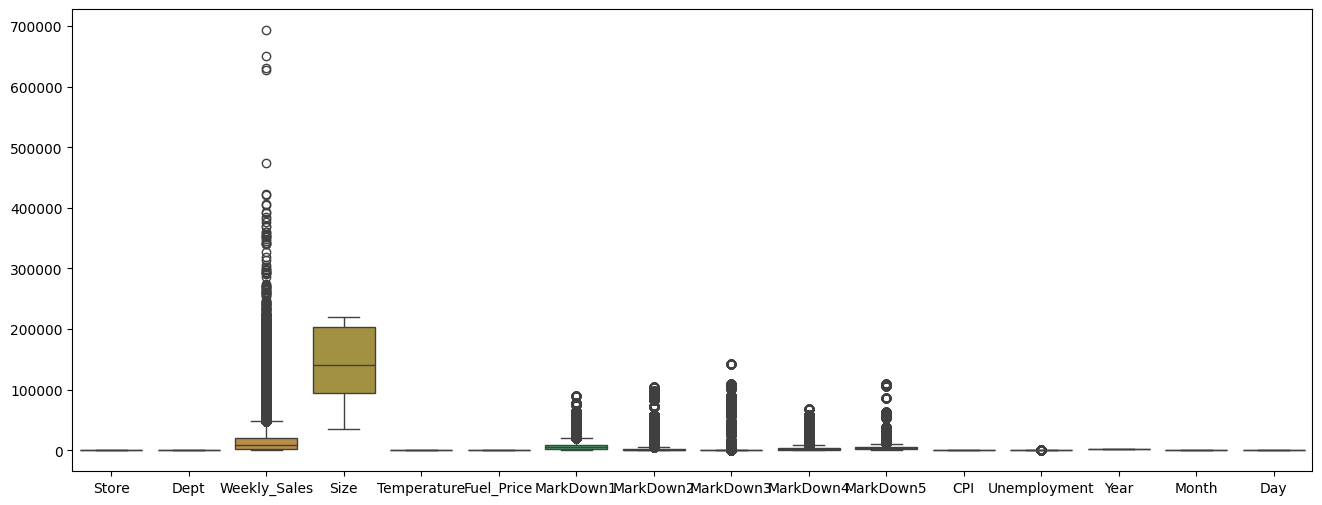

In [69]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data_num)
plt.show()

 # IQR

In [70]:
# #Handling Outliers
# def outlier_capping(x):
#     x = x.clip(upper=x.quantile(0.99))
#     x = x.clip(lower=x.quantile(0.01))
#     return x

# data_num=data_num.apply(outlier_capping)

# INVERSE METHOD

In [71]:
def inv_trans(x):
    return 1/x

data_4 = data_num.copy()
data_4['Weekly_Sales'] = data_4['Weekly_Sales'].apply(inv_trans)
# data_4['Total_MarkDown']=data_4['Total_MarkDown'].apply(inv_trans)
data_4['MarkDown1']=data_4['MarkDown1'].apply(inv_trans)
data_4['MarkDown2']=data_4['MarkDown2'].apply(inv_trans)
data_4['MarkDown3']=data_4['MarkDown3'].apply(inv_trans)
data_4['MarkDown4']=data_4['MarkDown4'].apply(inv_trans)
data_4['MarkDown5']=data_4['MarkDown5'].apply(inv_trans)

In [72]:
data_4.Weekly_Sales

0         0.000040
1         0.000022
2         0.000024
3         0.000052
4         0.000046
            ...   
421565    0.001967
421566    0.001592
421567    0.000942
421568    0.001316
421569    0.000929
Name: Weekly_Sales, Length: 421570, dtype: float64

After treating outliers we need to check the distribution of the data.

In [73]:
data_4.MarkDown1

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
421565    0.000219
421566    0.000198
421567    0.000511
421568    0.000499
421569    0.000249
Name: MarkDown1, Length: 421570, dtype: float64

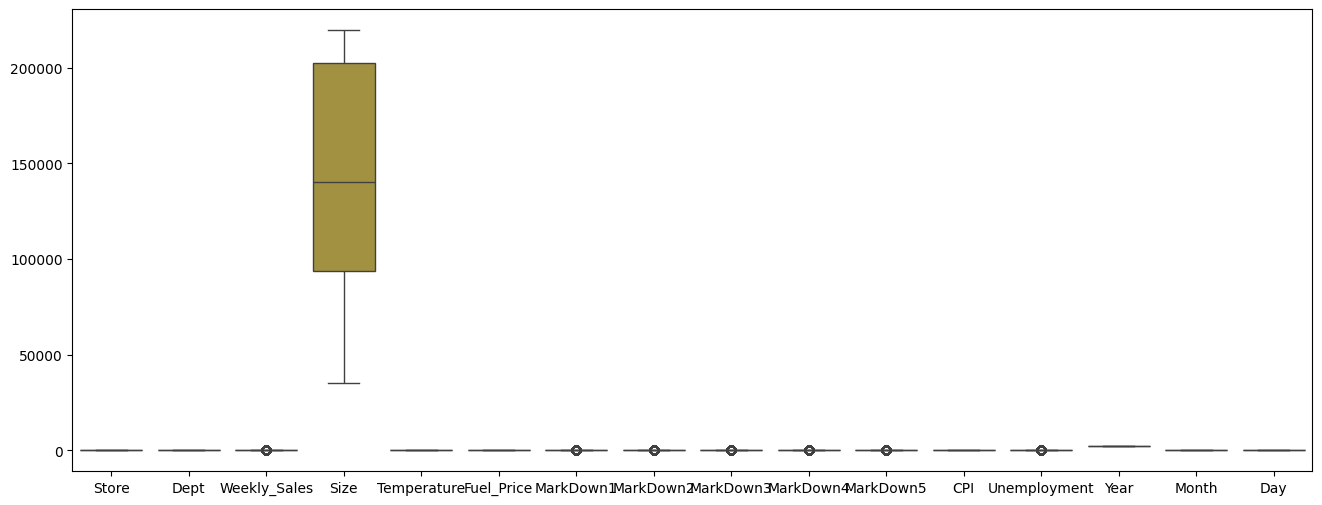

In [74]:
plt.figure(figsize=(16,6))
sns.boxplot(data=data_4)
plt.show()

In [75]:
data_num.isna().sum()

Store                0
Dept                 0
Weekly_Sales      1358
Size                 0
Temperature         69
Fuel_Price           0
MarkDown1       270889
MarkDown2       311840
MarkDown3       284803
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Day                  0
dtype: int64

# Handling Missing values

In [76]:
#Handling missings
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(Missing_imputation)

In [77]:
data_num.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Year            0
Month           0
Day             0
dtype: int64

# Dummy Creation

In [78]:
# # An utility function to create dummy variable
# def create_dummies( df, colname ):
#     col_dummies = pd.get_dummies(df[colname], prefix=colname, drop_first=True)
#     df = pd.concat([df, col_dummies], axis=1)
#     df.drop( colname, axis = 1, inplace = True )
#     return df

In [79]:
# for c_feature in ['IsHoliday', 'Type']:
#     data_cat.loc[:,c_feature] = data_cat[c_feature].astype('category')
#     data_cat = create_dummies(data_cat , c_feature )

# data_cat.head()

In [80]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Type       421570 non-null  object
 1   IsHoliday  421570 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 3.6+ MB


# ENCODING

In [81]:
from sklearn.preprocessing import LabelEncoder

encode=LabelEncoder()

data_cat["IsHoliday"] = encode.fit_transform(data_cat[["IsHoliday"]])
data_cat["Type"] = encode.fit_transform(data_cat[["Type"]])


data_cat.head()

c:\Users\jeetg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jeetg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Type,IsHoliday
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [82]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   Type       421570 non-null  int32
 1   IsHoliday  421570 non-null  int64
dtypes: int32(1), int64(1)
memory usage: 4.8 MB


### Final file for analysis

In [83]:
data = pd.concat([data_num, data_cat], axis=1)
data.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
0,1,1,24924.50,151315,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,2010,2,5,0,0
1,1,1,46039.49,151315,38.51,2.548,5347.45,203.26,24.73,1481.31,3359.45,211.242170,8.106,2010,2,12,0,1
2,1,1,41595.55,151315,39.93,2.514,5347.45,203.26,24.73,1481.31,3359.45,211.289143,8.106,2010,2,19,0,0
3,1,1,19403.54,151315,46.63,2.561,5347.45,203.26,24.73,1481.31,3359.45,211.319643,8.106,2010,2,26,0,0
4,1,1,21827.90,151315,46.50,2.625,5347.45,203.26,24.73,1481.31,3359.45,211.350143,8.106,2010,3,5,0,0


# STAT

# CORRELATION

In [84]:
# correlation matrix (ranges from 1 to -1)
corrm=data.corr()
corrm.to_csv('corrm.csv')
corrm

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
Store,1.000000,0.024004,-0.085116,-0.182881,-0.050821,0.065290,-0.070700,-0.032979,-0.020290,-0.027762,-0.015393,-0.211088,0.208552,0.002997,0.001011,-0.000015,0.226410,-0.000548
Dept,0.024004,1.000000,0.148330,-0.002966,0.004440,0.003572,-0.000587,0.000561,0.001468,0.002169,0.000896,-0.007477,0.007837,0.003738,0.000904,-0.000678,0.003708,0.000916
Weekly_Sales,-0.085116,0.148330,1.000000,0.243852,-0.002519,-0.000021,0.052740,0.020414,0.038500,0.033798,0.055720,-0.021026,-0.025823,-0.010060,0.028391,-0.006221,-0.182142,0.012800
Size,-0.182881,-0.002966,0.243852,1.000000,-0.058984,0.003361,0.203202,0.077045,0.033536,0.112056,0.179588,-0.003314,-0.068238,-0.004975,-0.001210,-0.000386,-0.811593,0.000593
Temperature,-0.050821,0.004440,-0.002519,-0.058984,1.000000,0.143558,-0.025244,-0.179300,-0.056064,-0.044824,-0.011973,0.182580,0.097082,0.065898,0.235421,0.026098,0.043372,-0.156250
Fuel_Price,0.065290,0.003572,-0.000021,0.003361,0.143558,1.000000,0.110255,0.023561,0.017681,0.092716,0.033922,-0.164210,-0.033853,0.779633,-0.040876,0.028058,0.029687,-0.078281
MarkDown1,-0.070700,-0.000587,0.052740,0.203202,-0.025244,0.110255,1.000000,0.088153,-0.075526,0.816148,0.186165,-0.021389,-0.012874,0.185703,-0.108817,-0.165252,-0.151113,-0.017418
MarkDown2,-0.032979,0.000561,0.020414,0.077045,-0.179300,0.023561,0.088153,1.000000,-0.008790,0.068822,0.046869,-0.004593,-0.038552,0.121419,-0.018427,0.051002,-0.053992,0.207675
MarkDown3,-0.020290,0.001468,0.038500,0.033536,-0.056064,0.017681,-0.075526,-0.008790,1.000000,-0.035484,-0.001378,-0.005973,-0.017654,0.005220,0.116010,0.072234,-0.023966,0.266463
MarkDown4,-0.027762,0.002169,0.033798,0.112056,-0.044824,0.092716,0.816148,0.068822,-0.035484,1.000000,0.155688,-0.013369,-0.040124,0.213926,-0.112367,-0.166197,-0.075250,0.006756


# HEATMAP

<Axes: >

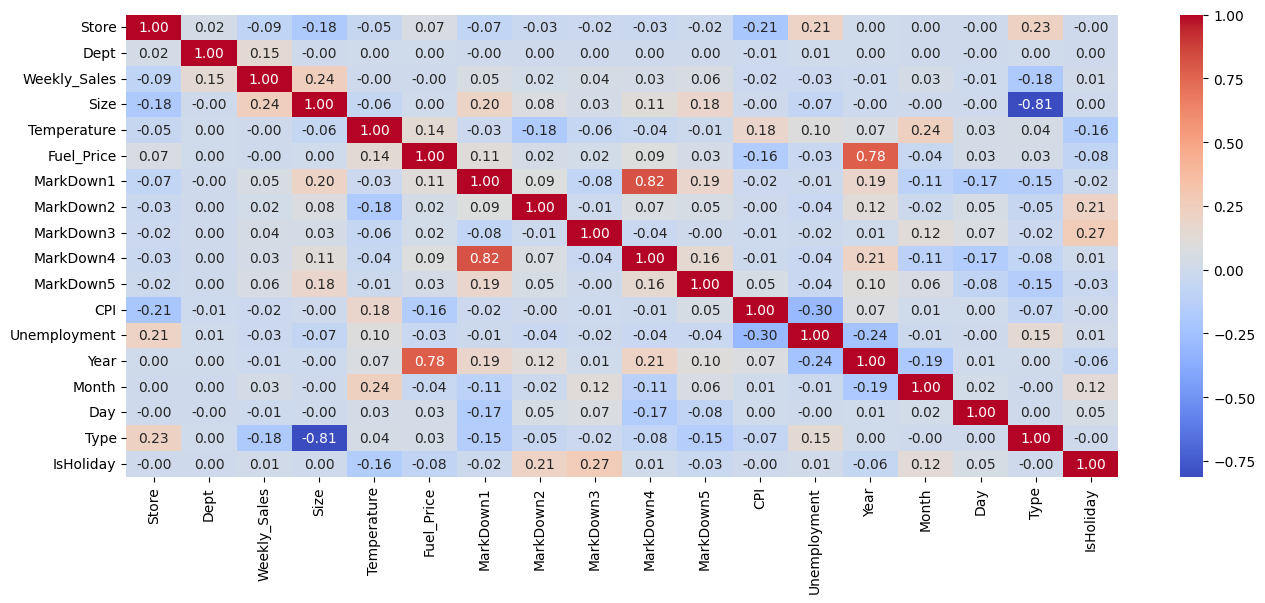

In [85]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="coolwarm",fmt=".2f")

In [86]:
data.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'Size', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Year', 'Month', 'Day', 'Type', 'IsHoliday'],
      dtype='object')

# Normality Check

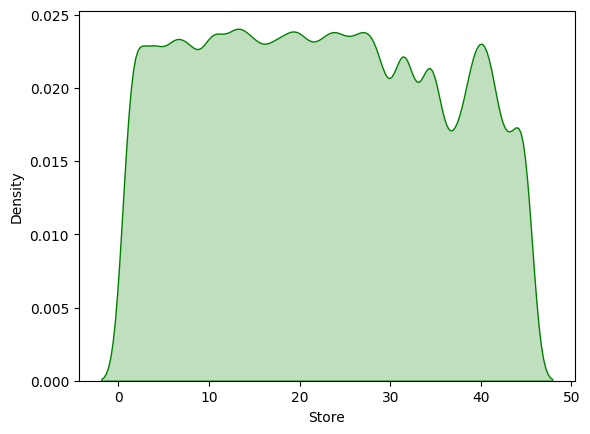

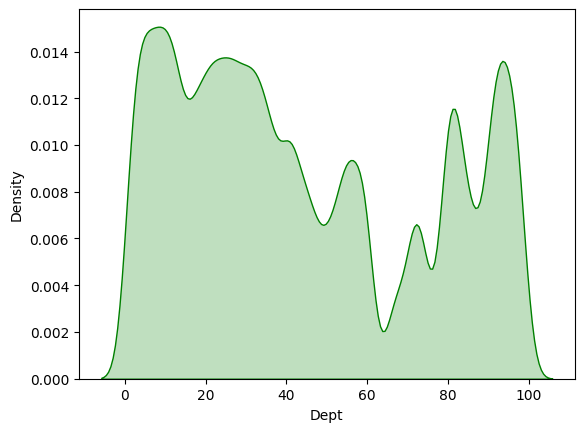

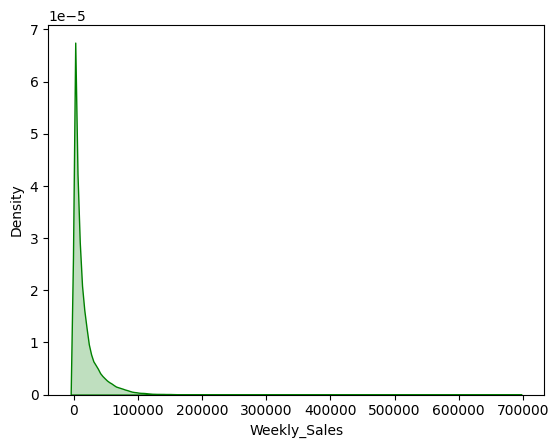

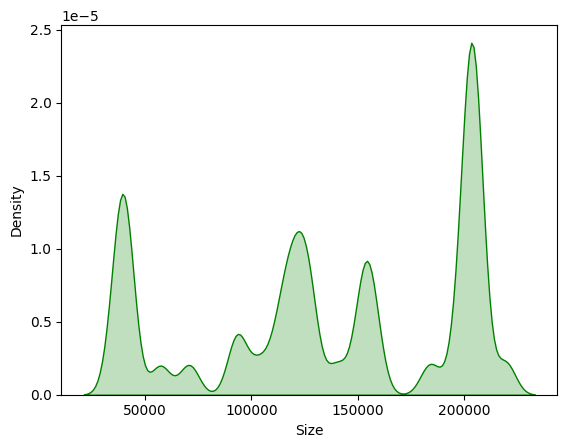

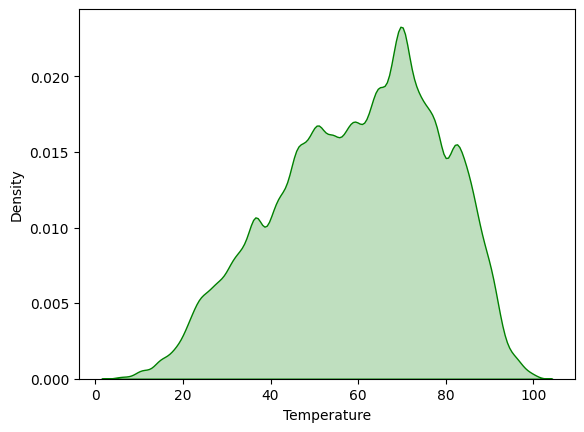

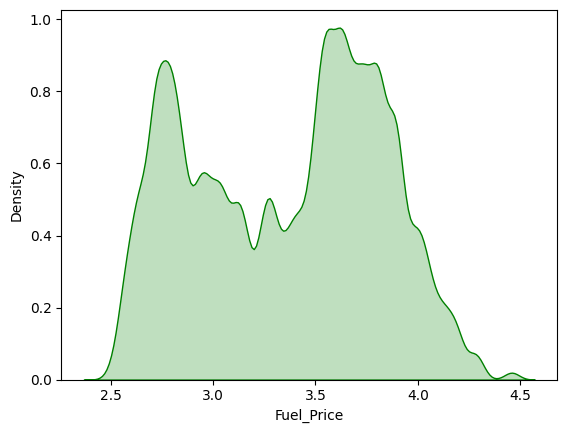

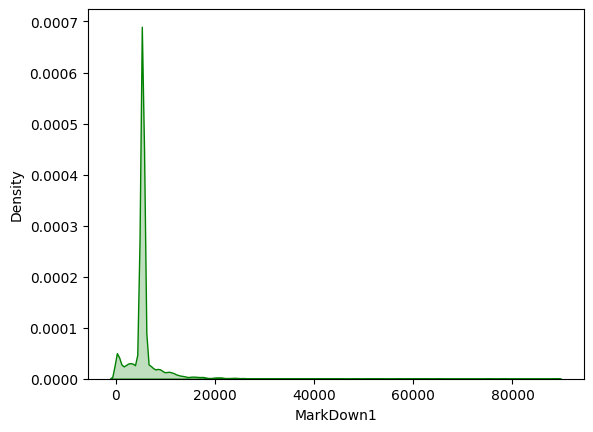

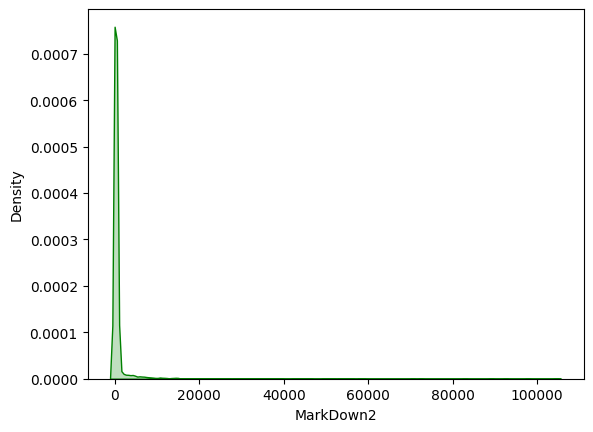

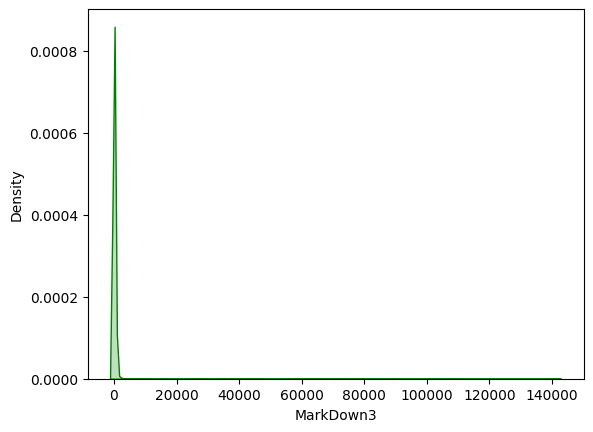

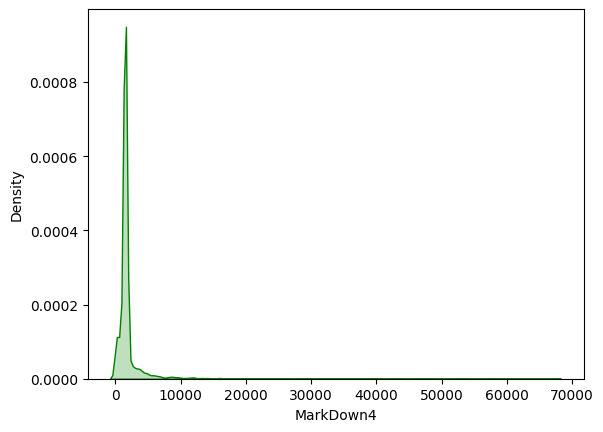

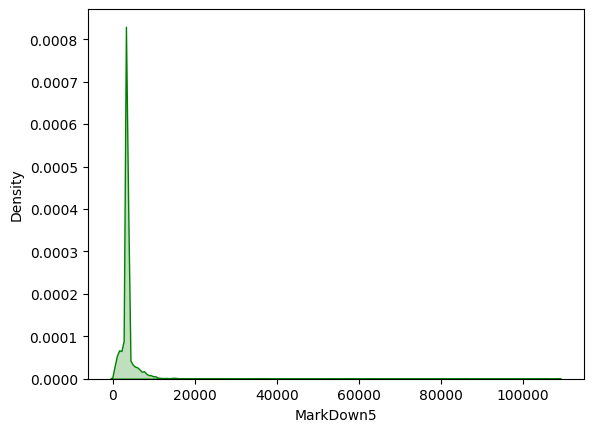

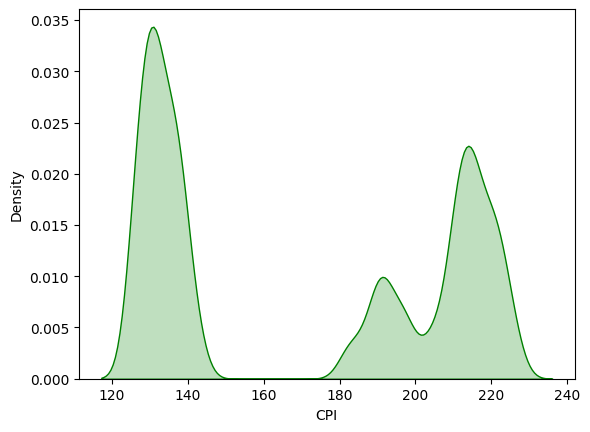

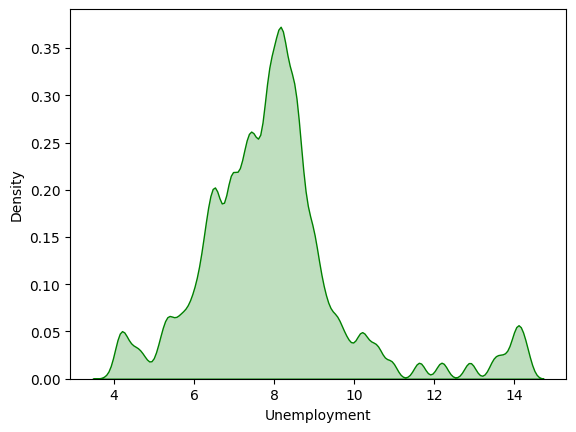

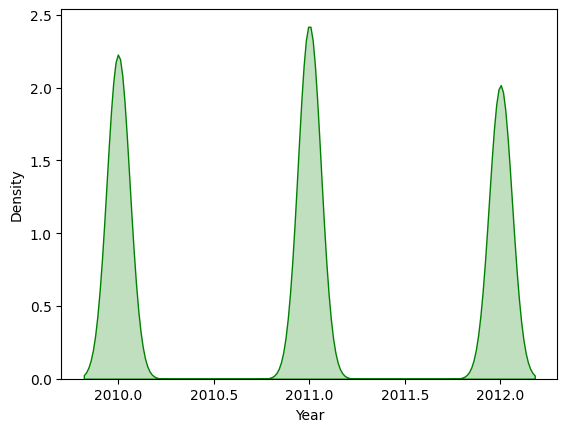

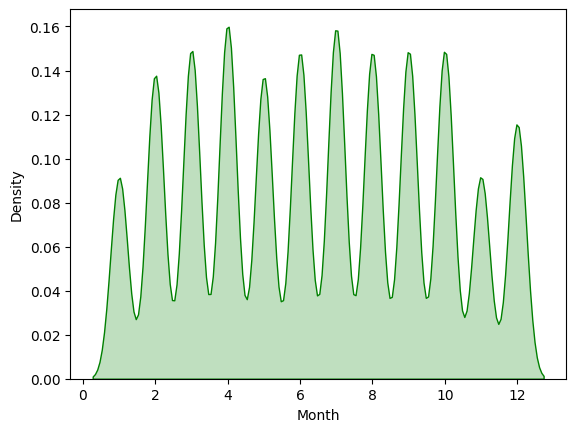

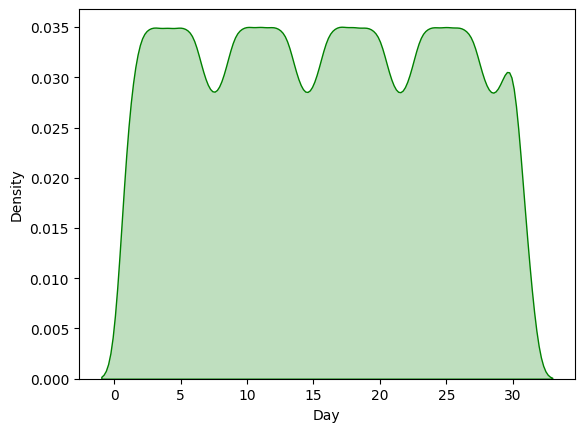

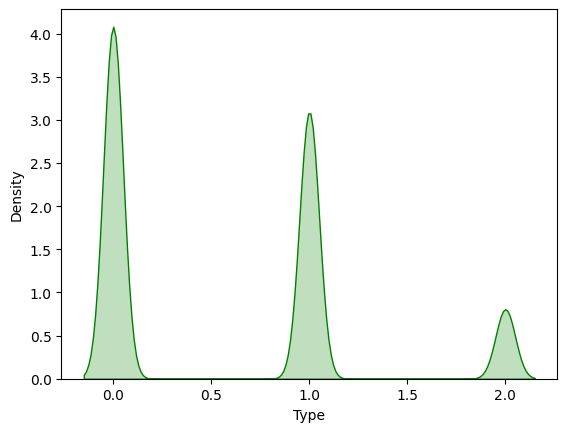

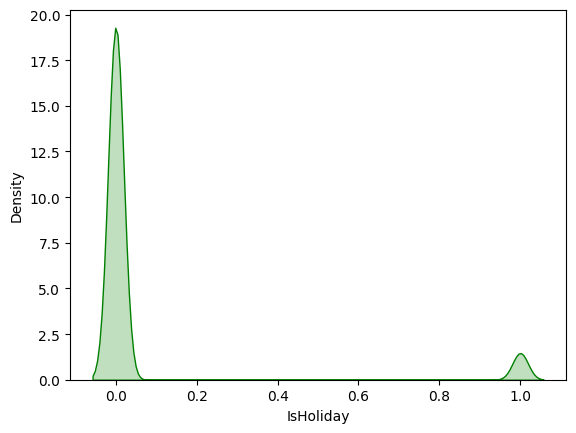

In [87]:
for i in data.columns:
    sns.kdeplot(data=data[i],fill=True,color="g")
    plt.show()

In [88]:
# save final processed data
data.to_csv("final_data.csv")

In [89]:
data.head()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
0,1,1,24924.50,151315,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,2010,2,5,0,0
1,1,1,46039.49,151315,38.51,2.548,5347.45,203.26,24.73,1481.31,3359.45,211.242170,8.106,2010,2,12,0,1
2,1,1,41595.55,151315,39.93,2.514,5347.45,203.26,24.73,1481.31,3359.45,211.289143,8.106,2010,2,19,0,0
3,1,1,19403.54,151315,46.63,2.561,5347.45,203.26,24.73,1481.31,3359.45,211.319643,8.106,2010,2,26,0,0
4,1,1,21827.90,151315,46.50,2.625,5347.45,203.26,24.73,1481.31,3359.45,211.350143,8.106,2010,3,5,0,0


In [90]:
da=data[data['Type']==1]

In [91]:
da

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
20482,3,1,6453.58,37392,45.71,2.572,5347.45,203.26,24.73,1481.31,3359.45,214.424881,7.368,2010,2,5,1,0
20483,3,1,12748.72,37392,47.93,2.548,5347.45,203.26,24.73,1481.31,3359.45,214.574792,7.368,2010,2,12,1,1
20484,3,1,8918.31,37392,47.07,2.514,5347.45,203.26,24.73,1481.31,3359.45,214.619887,7.368,2010,2,19,1,0
20485,3,1,4992.00,37392,52.05,2.561,5347.45,203.26,24.73,1481.31,3359.45,214.647513,7.368,2010,2,26,1,0
20486,3,1,5172.73,37392,53.04,2.625,5347.45,203.26,24.73,1481.31,3359.45,214.675139,7.368,2010,3,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,508.37,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28,1,0
421566,45,98,628.10,118221,64.89,3.985,5046.74,203.26,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5,1,0
421567,45,98,1061.02,118221,54.47,4.000,1956.28,203.26,7.89,599.32,3990.54,192.327265,8.667,2012,10,12,1,0
421568,45,98,760.01,118221,56.47,3.969,2004.02,203.26,3.18,437.73,1537.49,192.330854,8.667,2012,10,19,1,0


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   Size          421570 non-null  int64  
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Year          421570 non-null  int64  
 14  Month         421570 non-null  int64  
 15  Day           421570 non-null  int64  
 16  Type          421570 non-null  int32  
 17  IsHoliday     421570 non-null  int64  
dtypes: f

# Hypothesis Testing

### ttest

In [93]:
### threshold for hypo test = 0.05
_, pvalue = stats.ttest_ind(data['Unemployment'],data['Fuel_Price'])
pvalue

0.0

In [94]:
_, pvalue = stats.ttest_ind(data['Unemployment'],data['CPI'])
pvalue

0.0

In [95]:
_, pvalue = stats.ttest_ind(data['Unemployment'],data['Year'])
pvalue

0.0

In [96]:
_, pvalue = stats.ttest_ind(data['MarkDown1'],data['Year'])
pvalue

0.0

In [97]:
_, pvalue = stats.ttest_ind(data['Type'],data['Size'])
pvalue

0.0

In [98]:
_, pvalue = stats.ttest_ind(data['MarkDown1'],data['MarkDown4'])
pvalue

0.0

In [99]:
_, pvalue = stats.ttest_ind(data['Year'],data['Fuel_Price'])
pvalue

0.0

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   Size          421570 non-null  int64  
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Year          421570 non-null  int64  
 14  Month         421570 non-null  int64  
 15  Day           421570 non-null  int64  
 16  Type          421570 non-null  int32  
 17  IsHoliday     421570 non-null  int64  
dtypes: f

# MODEL BUILDING

## Feature Importance

In [101]:
x=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']

In [102]:
x

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,Day,Type,IsHoliday
0,1,1,151315,42.31,2.572,5347.45,203.26,24.73,1481.31,3359.45,211.096358,8.106,2010,2,5,0,0
1,1,1,151315,38.51,2.548,5347.45,203.26,24.73,1481.31,3359.45,211.242170,8.106,2010,2,12,0,1
2,1,1,151315,39.93,2.514,5347.45,203.26,24.73,1481.31,3359.45,211.289143,8.106,2010,2,19,0,0
3,1,1,151315,46.63,2.561,5347.45,203.26,24.73,1481.31,3359.45,211.319643,8.106,2010,2,26,0,0
4,1,1,151315,46.50,2.625,5347.45,203.26,24.73,1481.31,3359.45,211.350143,8.106,2010,3,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,118221,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,2012,9,28,1,0
421566,45,98,118221,64.89,3.985,5046.74,203.26,18.82,2253.43,2340.01,192.170412,8.667,2012,10,5,1,0
421567,45,98,118221,54.47,4.000,1956.28,203.26,7.89,599.32,3990.54,192.327265,8.667,2012,10,12,1,0
421568,45,98,118221,56.47,3.969,2004.02,203.26,3.18,437.73,1537.49,192.330854,8.667,2012,10,19,1,0


In [103]:
y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

# Ordinary Least Square

In [104]:
import statsmodels.api as sm

#creating a model by using independent and dependent variable through OLS method
model = sm.OLS(y,x)

In [105]:
#training the model
result = model.fit()

print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:           Weekly_Sales   R-squared (uncentered):                   0.391
Model:                            OLS   Adj. R-squared (uncentered):              0.391
Method:                 Least Squares   F-statistic:                          1.590e+04
Date:                Tue, 28 May 2024   Prob (F-statistic):                        0.00
Time:                        16:52:24   Log-Likelihood:                     -4.8072e+06
No. Observations:              421570   AIC:                                  9.614e+06
Df Residuals:                  421553   BIC:                                  9.615e+06
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [106]:
result.params

Store            -94.210347
Dept             111.604902
Size               0.102867
Temperature       19.371040
Fuel_Price      -408.671918
MarkDown1         -0.029580
MarkDown2          0.007496
MarkDown3          0.108763
MarkDown4          0.067034
MarkDown5          0.081625
CPI              -20.992077
Unemployment    -200.280590
Year               1.170056
Month            145.288899
Day              -18.189147
Type            1900.252388
IsHoliday        441.553840
dtype: float64

# Train Test Split

In [107]:
# assign feature and target variable
X=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [108]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(337256, 17) (84314, 17) (337256,) (84314,)


# ML MODELS

# Linear Regression (LR)

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
linear_model = LinearRegression(fit_intercept=True) #initialise

linear_model.fit(X_train,y_train) #fit - all magic

LinearRegression()

In [111]:
predicted_result = linear_model.predict(X_test)
print(predicted_result)

[ 8852.59861512 15025.85189948 20041.30718875 ... 22848.11068733
 12979.10550469 21608.49857874]


In [112]:
print(y_test)

394935        43.27
83180       2642.03
259789     41611.16
127139    169990.21
231371      5850.01
            ...    
62722       1509.50
242131     45710.06
380667     20211.89
418022      1352.15
13828       2866.43
Name: Weekly_Sales, Length: 84314, dtype: float64


In [113]:
linear_model.score(X_test, y_test)

0.08487960639322278

In [114]:
# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, predicted_result)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, predicted_result)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, predicted_result)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 14564.296053281356
Mean Squared Error (MSE)     : 476639605.9991985
Root Mean Square Error (RMSE): 21832.077454956012
R-squared (R2) Score         : 0.08487960639322278


# Decision Tree

In [115]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict

In [116]:
regressor = DecisionTreeRegressor(max_depth=5,random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=0)

In [117]:
pred=regressor.predict(X_train)
y_pred=regressor.predict(X_test)

In [118]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9466.159329232107
Mean Squared Error: 234556600.0126818
Root Mean Squared Error: 15315.240775537348


In [119]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 9556.267705078622
Mean Squared Error: 244746271.969864
Root Mean Squared Error: 15644.368698348426


In [120]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.543463248023164
R-squared for Test: 0.5301013555738171


### Tuning a regression tree

In [121]:
# list of values to try
max_depth_range = range(5, 15)

# list to store the average RMSE for each value of max_depth
RMSE_Scores = []
MSE_Scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=345)

    MSE_scores = cross_val_score(treereg, X_train, y_train, scoring='neg_mean_squared_error')

    RMSE_Scores.append(np.mean(np.sqrt(-MSE_scores)))
    MSE_Scores.append(MSE_scores)

In [122]:
print (RMSE_Scores)

[15327.988615686667, 12364.438291155806, 11288.073316518075, 10288.695909463142, 9353.23596912764, 8326.685125932874, 7478.827461624413, 6781.669086646578, 6201.309348820581, 5791.899379848795]


Text(0, 0.5, 'RMSE (lower is better)')

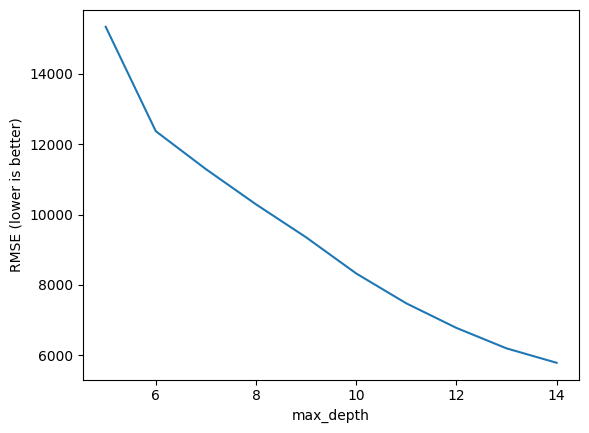

In [123]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_Scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

### Building Final Decision Tree Model

In [124]:
# max_depth=11 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=14, random_state=345)
treereg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=14, random_state=345)

In [125]:
treereg.feature_importances_

array([5.93525387e-02, 6.53549313e-01, 1.86099153e-01, 6.29958219e-03,
       1.49193600e-03, 5.26641466e-04, 7.48137810e-04, 9.14628178e-03,
       6.08882533e-04, 2.99796988e-04, 2.42761464e-02, 7.73418023e-03,
       1.80294881e-04, 2.25534390e-02, 1.14969636e-02, 1.40579740e-02,
       1.57873855e-03])

In [126]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':data.columns.difference(['Weekly_Sales']), 'importance':treereg.feature_importances_})

,feature,importance
0,CPI,0.059353
1,Day,0.653549
2,Dept,0.186099
3,Fuel_Price,0.006300
4,IsHoliday,0.001492
5,MarkDown1,0.000527
6,MarkDown2,0.000748
7,MarkDown3,0.009146
8,MarkDown4,0.000609
9,MarkDown5,0.000300


## Creating a tree diagram

In [127]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_vehicles.png', feature_names=data.columns.difference(['Weekly_Sales']))

## Making predictions

In [128]:
pred=treereg.predict(X_train)
y_pred=treereg.predict(X_test)

In [129]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 2171.435228816207
Mean Squared Error: 19711294.548681486
Root Mean Squared Error: 4439.740369512781


In [130]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 2515.5157968612784
Mean Squared Error: 30855183.97525836
Root Mean Squared Error: 5554.7442763153695


In [131]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9616342904440668
R-squared for Test: 0.9407598366798426


# Random Forest (RF)

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
rfr = RandomForestRegressor(max_depth=5,n_estimators=20, random_state=0)
rfr.fit(X_train, y_train)
pred = rfr.predict(X_train)

In [134]:
y_pred= rfr.predict(X_test)
y_pred

array([ 5085.44839035, 12104.75138096, 12104.75138096, ...,
       19625.69729559,  5652.21081491, 12104.75138096])

In [135]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9087.740471505385
Mean Squared Error: 215259803.9409553
Root Mean Squared Error: 14671.734864730732


In [136]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 9174.219730345345
Mean Squared Error: 225071114.45562023
Root Mean Squared Error: 15002.370294577462


In [137]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.5810221851908628
R-squared for Test: 0.5678765166432906


### Tuning a Random Forest

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
param_grid={'max_depth': range(8,15),
            'n_estimators': (10, 50)}

In [140]:
# Perform Grid-Search
gsc = GridSearchCV(estimator=RandomForestRegressor(),param_grid=param_grid, verbose=0, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)

In [141]:
grid_result.best_score_

0.9532790317072785

In [142]:
grid_result.best_params_

{'max_depth': 14, 'n_estimators': 50}

### Building Final Random Forest Model

In [143]:
rfr = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=50, random_state=0)

In [144]:
pred = rfr.predict(X_train)
y_pred = rfr.predict(X_test)

In [145]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 2021.0082085246422
Mean Squared Error: 16455443.906193608
Root Mean Squared Error: 4056.5310187638906


In [146]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 2252.7981915846453
Mean Squared Error: 23692414.593568917
Root Mean Squared Error: 4867.485448726983


In [147]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9679714196366059
R-squared for Test: 0.9545119383797112


# Gradient Boosting (GBM)

In [148]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import ShuffleSplit

In [149]:
gbrt=GradientBoostingRegressor()
gbrt.fit(X_train, y_train)

GradientBoostingRegressor()

In [150]:
pred=gbrt.predict(X_train)
y_pred=gbrt.predict(X_test)

In [151]:
#One of the benefits of growing trees is that we can understand how important each of the features are
print(gbrt.feature_importances_)

[2.69657263e-02 7.39211350e-01 2.05832570e-01 4.23153761e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 8.14368486e-03
 6.19726732e-05 2.04500423e-05 9.98913990e-03 4.86621887e-04
 0.00000000e+00 3.37911178e-03 1.08837365e-03 4.29069328e-03
 1.07152380e-04]


In [152]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 6910.761671282379
Mean Squared Error: 132764851.16457227
Root Mean Squared Error: 11522.363089426242


In [153]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 6956.13065486371
Mean Squared Error: 138378036.80223298
Root Mean Squared Error: 11763.419434936126


In [154]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.7415888790846867
R-squared for Test: 0.7343221966636035


### Tuning a Gradient Boosting Model (GBM)

In [155]:
param_grid={'learning_rate' : [0.1,0.01],# 0.02,0.05,0.1],
            'max_depth' : [4,6]}# 5,6]

In [156]:
# Perform Grid-Search
gbr = GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=param_grid)

grid_result = gbr.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_result.best_score_

0.9036263327889212

In [ ]:
grid_result.best_params_

{'learning_rate': 0.1, 'max_depth': 6}

### Building Final Gradient Boosting Model

In [ ]:
gbrt=GradientBoostingRegressor(learning_rate=0.01, max_depth=6)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=6)

In [ ]:
pred=gbrt.predict(X_train)
y_pred=gbrt.predict(X_test)

In [ ]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9016.409901337167
Mean Squared Error: 194296736.36029217
Root Mean Squared Error: 13939.036421513942


In [ ]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 9069.2631470758
Mean Squared Error: 201631713.3216752
Root Mean Squared Error: 14199.70821255406


In [ ]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.6218243232855889
R-squared for Test: 0.6128788070984379


# XGBOOST

In [ ]:
import xgboost as xgb
import warnings

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)
xg_reg = xgb.XGBRegressor(objective='reg:squarederror')
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred=xg_reg.predict(X_train)
y_pred=xg_reg.predict(X_test)

In [ ]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 2986.819287708257
Mean Squared Error: 27556757.344624504
Root Mean Squared Error: 5249.453051949747


In [ ]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 3054.0468201632925
Mean Squared Error: 30228059.917823825
Root Mean Squared Error: 5498.005085285374


In [ ]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9463640226177883
R-squared for Test: 0.941963878490587


### Tuning a XGBoost Model

In [ ]:
xgb1 = xgb.XGBRegressor(objective='reg:squarederror')

In [ ]:
parameters = {'learning_rate': [0.01,0.1], #so called `eta` value
              'max_depth': [4,5,6]}

In [ ]:
xgb_grid = GridSearchCV(xgb1,parameters,n_jobs = 5,verbose=True)

grid_result = xgb_grid.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:
print(xgb_grid.best_score_)

0.9032729206719653


In [ ]:
print(xgb_grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 6}


### Building Final XGBoost Model

In [ ]:
xg_reg = xgb.XGBRegressor(learning_rate=0.1, max_depth=9,objective='reg:squarederror')
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
pred=xg_reg.predict(X_train)
y_pred=xg_reg.predict(X_test)

In [ ]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 2161.8338139764387
Mean Squared Error: 14605449.77648095
Root Mean Squared Error: 3821.707704218227


In [ ]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 2299.6257864304857
Mean Squared Error: 18969329.32452913
Root Mean Squared Error: 4355.379354835711


In [ ]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.9715722149717599
R-squared for Test: 0.9635799881096141


# KNN

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
pred=knn.predict(X_train)
y_pred=knn.predict(X_test)

In [ ]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 9470.392952931898
Mean Squared Error: 232345902.26023522
Root Mean Squared Error: 15242.89678047566


In [ ]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 11617.260990393053
Mean Squared Error: 354179937.67199284
Root Mean Squared Error: 18819.668904419992


In [ ]:
from sklearn.metrics import r2_score

print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.5477661104088307
R-squared for Test: 0.3199950656837298


### Tuning a KNN Model

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 25234.697951987582
RMSE value for k=  2 is: 21335.98562644733
RMSE value for k=  3 is: 19945.33412239025
RMSE value for k=  4 is: 19236.56738271351
RMSE value for k=  5 is: 18819.668904419992
RMSE value for k=  6 is: 18727.53239760392
RMSE value for k=  7 is: 18661.433087157857
RMSE value for k=  8 is: 18642.545908775093
RMSE value for k=  9 is: 18646.864727239616
RMSE value for k=  10 is: 18662.247712958273
RMSE value for k=  11 is: 18679.036576946142
RMSE value for k=  12 is: 18681.304368661928
RMSE value for k=  13 is: 18690.754981034235
RMSE value for k=  14 is: 18692.614175905826
RMSE value for k=  15 is: 18676.001096877804
RMSE value for k=  16 is: 18682.61820078157
RMSE value for k=  17 is: 18695.308815517794
RMSE value for k=  18 is: 18711.344760099746
RMSE value for k=  19 is: 18734.648073477736
RMSE value for k=  20 is: 18771.427208525307


<Axes: >

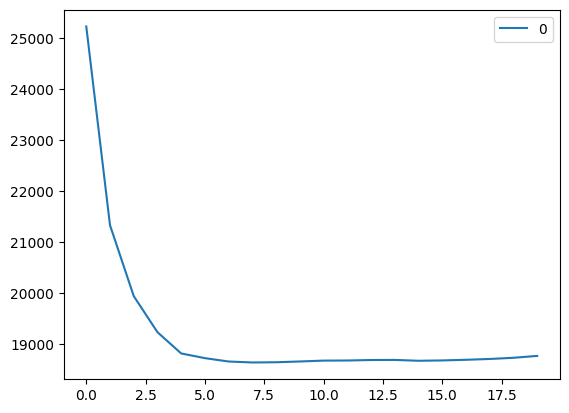

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve
curve.plot()

### Building Final KNN Model

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors=11)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
pred=knn.predict(X_train)
y_pred=knn.predict(X_test)

In [ ]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 10319.647645953328
Mean Squared Error: 281222761.3153518
Root Mean Squared Error: 16769.69771091154


In [ ]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 11442.486578310083
Mean Squared Error: 348906407.44289184
Root Mean Squared Error: 18679.036576946142


In [ ]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.4526330701164405
R-squared for Test: 0.33011993780558246


# Neural Network

### Voting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
import warnings

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)  # Ignore FutureWarning
reg1 = GradientBoostingRegressor(learning_rate=0.01, max_depth=6)
reg2 = RandomForestRegressor(max_depth=14,n_estimators=50, random_state=0)
reg3 = xgb.XGBRegressor(learning_rate=0.1, max_depth=4,objective='reg:squarederror')
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('xg', reg3)])
ereg = ereg.fit(X_train, y_train)

In [ ]:
pred= ereg.predict(X_train)
y_pred= ereg.predict(X_test)

In [ ]:
print('Train : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred)))

Train : 
Mean Absolute Error: 5049.747102458478
Mean Squared Error: 69630607.26383889
Root Mean Squared Error: 8344.495626689422


In [ ]:
print('Test : ')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Test : 
Mean Absolute Error: 5113.892132052376
Mean Squared Error: 75987420.67679532
Root Mean Squared Error: 8717.076383558613


In [ ]:
print("R-squared for Train:",r2_score(y_train, pred))
print("R-squared for Test:",r2_score(y_test, y_pred))

R-squared for Train: 0.8644722370775797
R-squared for Test: 0.854108560338501


# Decision of taking which model to use

## Comparing Models

In [ ]:

# - Linear Regressor Accuracy        -     84.879606
# - Random Forest Regressor Accuracy -     95.451193
# - Decision Tree Regressor Accuracy -     94.075983
# - K Neighbors Regressor Accuracy   -     91.972603
# - XGBoost Accuracy                 -     94.211523 
# - DNN Accuracy                     -     90.503287


# Save Model

In [157]:
import pickle
# Saving model to disk of random forest
pickle.dump(rfr, open('model.pkl','wb'))

# Load Model and Predict

In [158]:
import pickle
model=pickle.load(open('model.pkl', 'rb'))
model.predict([[1,1	,151315,	10.00	,2.548	,211.242170	,8.106	,132.59, 125, 52, 0, 0	,2012	,12,	2,	2	,0]])

c:\Users\jeetg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([48272.1436503])

In [159]:
import numpy as np
import pickle
model=pickle.load(open('model.pkl', 'rb'))
x=np.array([[1, 1	,151315,	10.00	,3.548	,211.242170	,8.106	,140.59, 150, 85, 75, 0	,2012	,12,	2,	2	,1]])
model.predict(x)

c:\Users\jeetg\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([41633.47158102])